/tmp/ipykernel_2123154/1748606267.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


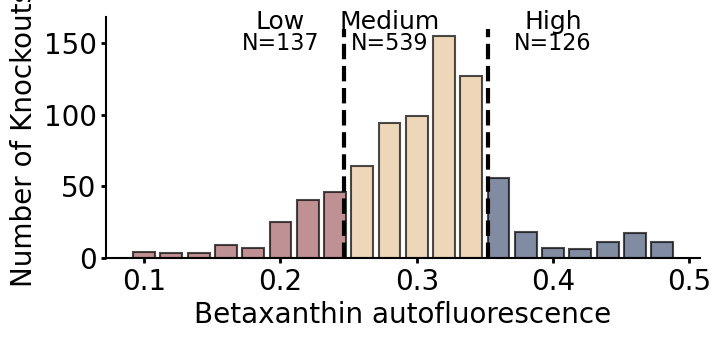

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
tools_path = '/home/cjmerzbacher/low_dim_analysis/tools'
sys.path.append(tools_path)
import colormaps as cmaps

# Read data
test_data = pd.read_csv('fig4a.csv')

# Create figure and axis
fig, ax = plt.subplots(figsize=(7.32, 3.48))

# Define colors
red = cmaps.lipari[128].colors
yellow = cmaps.lipari[225].colors
blue = cmaps.lipari[60].colors
colors = [red, yellow, blue]

# Plot bars for each group
for group in range(3):
    t = test_data.loc[test_data.group == group].groupby('knockout').mean()
    ax.bar(t.groupby('bins').count().index, t.groupby('bins').count().production, 
           color=colors[group], alpha=0.7, edgecolor='black', linewidth=1.5)

# Add vertical lines for category boundaries
ax.vlines(0.60*21, 0, 160, lw=3, color='black', linestyles='dashed')
ax.vlines(0.35*21, 0, 160, lw=3, color='black', linestyles='dashed')

# Add category labels
ax.text(0.45*20, 160, 'Medium', fontsize=18, color='black', ha='center')
ax.text(0.25*20, 160, 'Low', fontsize=18, color='black', ha='center')
ax.text(0.75*20, 160, 'High', fontsize=18, color='black', ha='center')

# Add sample size labels
ax.text(0.45*20, 145, 'N=539', fontsize=16, color='black', ha='center')
ax.text(0.25*20, 145, 'N=137', fontsize=16, color='black', ha='center')
ax.text(0.75*20, 145, 'N=126', fontsize=16, color='black', ha='center')

# Customize axis appearance
ax.set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_ylabel('Number of Knockouts', fontsize=20)
ax.set_xlabel('Betaxanthin autofluorescence', fontsize=20)
ax.xaxis.set_tick_params(width=2, labelsize=20)
ax.yaxis.set_tick_params(width=2, labelsize=20)

# Remove top and right spines, adjust remaining spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Adjust layout
fig.tight_layout()